In this example, we do a Fighting Words analysis on a Corpus of movie transcripts. Specifically, we want to examine how utterances of mixed-gender conversations (i.e. both male and female participants) differ from utterances of single-gender conversations in a **fictional** setting.

Before we get into the demo, we would like to note two things:
1. This is a quick and straightforward analysis for the purposes of demonstration. More rigorous analyses with a more nuanced approach to gender can be conducted, but we limit our analysis to male and female speakers because of the limitations of the dataset (which only has labels for male and female speakers).

2. This is an especially interesting example because it makes use of all three levels of the ConvoKit hierarchy in its analysis. Recall that we want to understand how *Utterances* from *Conversations* with different sets of *Speakers* differ linguistically.

### Loading a Corpus

In [1]:
from convokit import Corpus, download, TextCleaner, FightingWords

In [2]:
movie_corpus = Corpus(download('movie-corpus'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/movie-corpus


### Preprocessing: Cleaning the text of the utterances

This step cleans the texts of the Utterances by lowercasing and removing any unicode from them.

In [3]:
TextCleaner(verbosity=50000).transform(movie_corpus)

50000/304713 utterances processed
100000/304713 utterances processed
150000/304713 utterances processed
200000/304713 utterances processed
250000/304713 utterances processed
300000/304713 utterances processed
304713/304713 utterances processed


### Custom feature extraction: Labeling the Conversations as 'mixed-gender' or 'single-gender'

In [4]:
for convo in movie_corpus.iter_conversations():
    genders = set([speaker.meta['gender'] for speaker in convo.iter_speakers()])
    convo.meta['mixed'] = 'M' in genders and 'F' in genders

Notice that it is easy to link different components of the Corpus together. In this case, we set an attribute for each Conversation based on attributes of the Speakers that participate in said Conversation -- a step that might be significantly more difficult in other setups.

### Analysis: Applying the FightingWords transformer
This generates a summary of language differences between Utterances from the two types of Conversations

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 100931 valid utterances. class2_func returned 203782 valid utterances.
Vocab size is 15000
Comparing language...
ngram zscores computed.


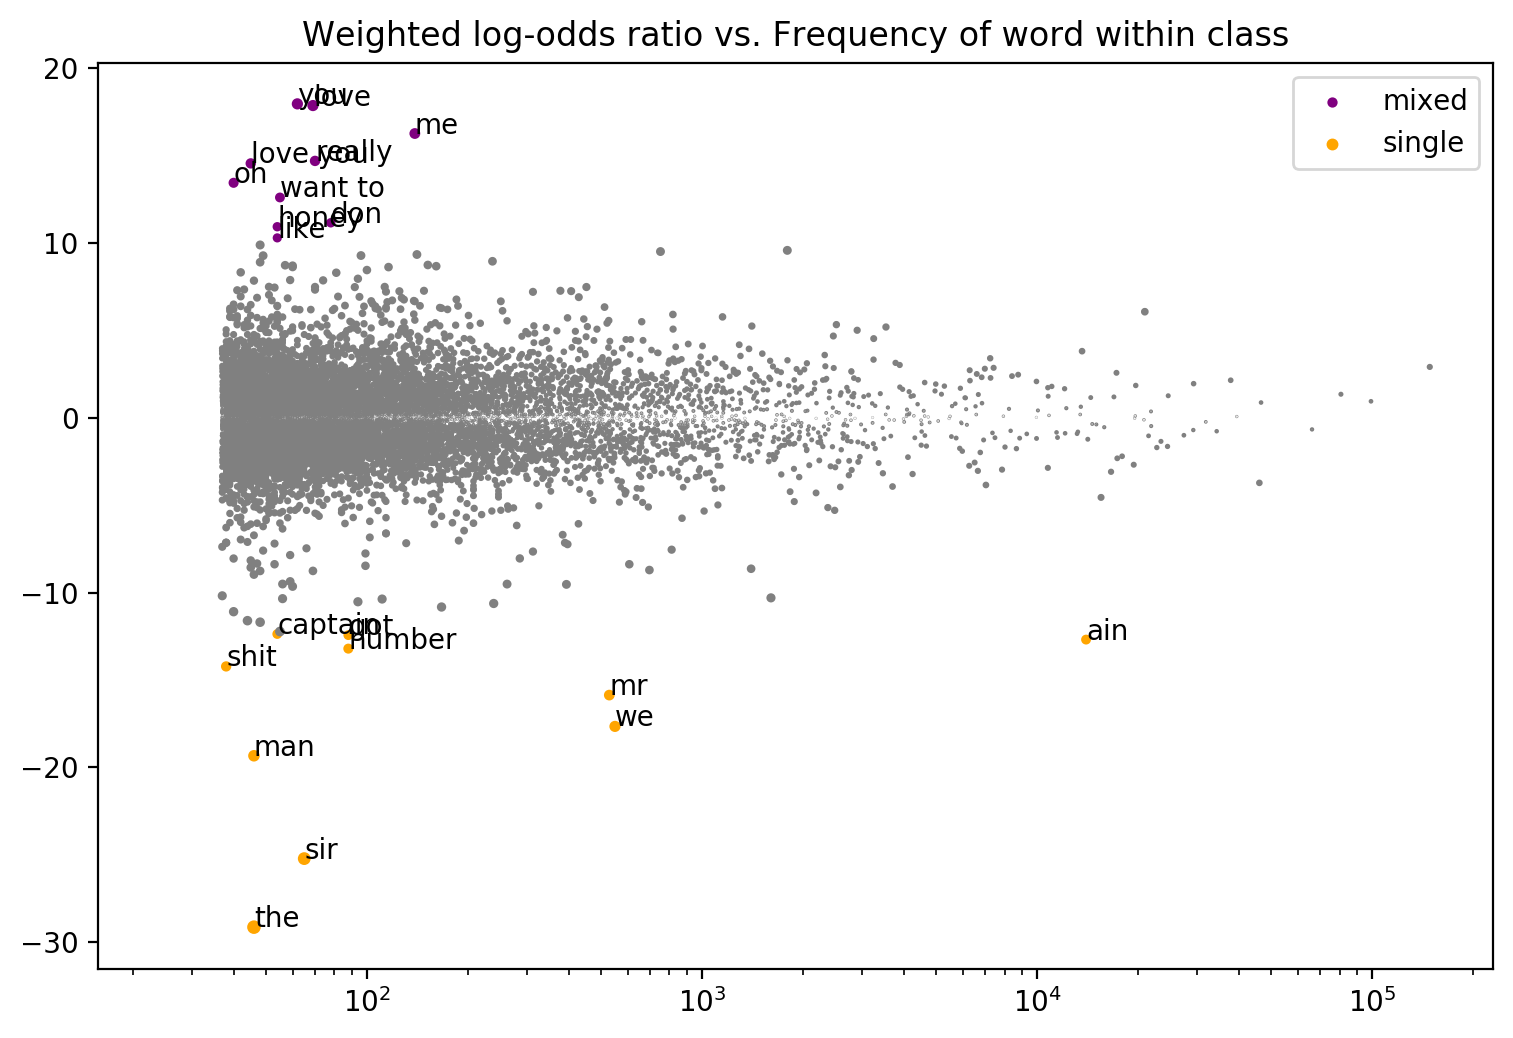

,z-score,class
ngram,,
the,-29.133167,single
sir,-25.211811,single
man,-19.330328,single
we,-17.650018,single
mr,-15.859251,single
shit,-14.219375,single
number,-13.201382,single
ain,-12.684295,single
got,-12.429083,single


In [5]:
fw = FightingWords()

fw.fit(movie_corpus, class1_func=lambda utt: utt.get_conversation().meta['mixed'],
       class2_func=lambda utt: not utt.get_conversation().meta['mixed'])

fw.summarize(movie_corpus, plot=True, class1_name='mixed', class2_name='single')

We see the mixed-gender conversations (class1) have more terms of endearment, like 'love' and 'honey', while single-gender conersations (class2) have more male terms of reference, such as 'man', 'mr', 'sir'.

This perhaps reflects known stereotypes that have been discussed in prior research, such as that mixed-gender conversations are more likely to be romantic in nature, while single-gender conversations are more likely to be between male characters (most movies fail the Bechdel test).